# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en el Tema 2 de la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* Fecha de entrega: **29 Enero 2019 a las 23:59 (hora española)** en la sección Actividades del aula de 05MAIR.
* 40% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

In [1]:
%matplotlib inline

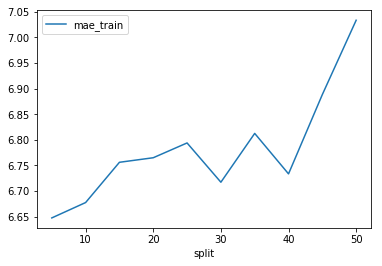

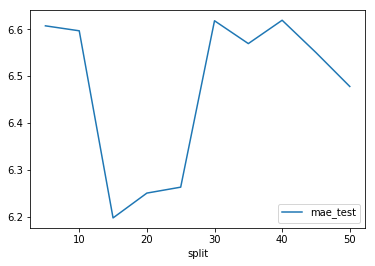

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Carga de datos
datos = datasets.load_boston()
 
# Algoritmo de aprendizaje
reg = DummyRegressor()

# Crea listas para almacenar los datos
list_split = []
list_training_error = []
list_test_error = []

# Iteración sobre un rango de porcentajes de test desde 5% hasta 50%
# en pasos de 5%
for i in range(5, 55, 5):
    list_split.append(i)
    
    # Divide el dataset en training/test
    X_train, X_test, y_train, y_test = train_test_split(
        datos.data, datos.target, test_size=i/100, random_state=0) 

    # Entrena el modelo
    reg.fit(X_train, y_train) 
    
    # Calcula la predicción y el MAE para el conjunto de entrenamiento
    y_train_pred = reg.predict(X_train)
    mae = mean_absolute_error(y_train, y_train_pred) 
    list_training_error.append(mae)
    
    # Calcula la predicción y el MAE para el conjunto de test
    y_test_pred = reg.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred) 
    list_test_error.append(mae)
    
# Crea un dataframe para contener todos los datos del gráfico
ds = pd.DataFrame()

ds['split'] = list_split
ds['mae_train'] = list_training_error
ds['mae_test'] = list_test_error

# Crea el gráfico con los datos de entrenamiento y lo muestra
ds.plot(x="split", y="mae_train", kind="line")
plt.show()

# Crea el gráfico con los datos de test y lo muestra
ds.plot(x="split", y="mae_test", kind="line")
plt.show()
 

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud).

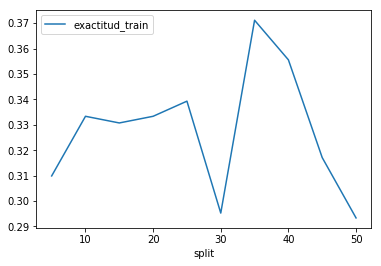

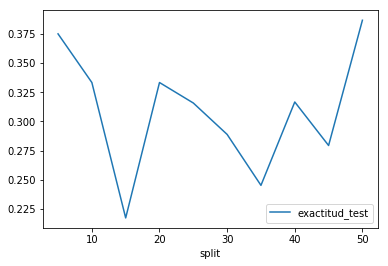

In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Carga de datos
datos = datasets.load_iris()
 
# Algoritmo de aprendizaje
reg = DummyClassifier()

# Crea listas para almacenar los datos
list_split = []
list_training_error = []
list_test_error = []

# Iteración sobre un rango de porcentajes de test desde 5% hasta 50%
# en pasos de 5%
for i in range(5, 55, 5):
    list_split.append(i)
    
    # Divide el dataset en training/test
    X_train, X_test, y_train, y_test = train_test_split(
        datos.data, datos.target, test_size=i/100, random_state=0) 

    # Entrena el modelo
    reg.fit(X_train, y_train) 
    
    # Calcula la predicción y el MAE para el conjunto de entrenamiento
    y_train_pred = reg.predict(X_train)
    exactitud = metrics.accuracy_score(y_train, y_train_pred) 
    list_training_error.append(exactitud)
    
    # Calcula la predicción y el MAE para el conjunto de test
    y_test_pred = reg.predict(X_test)
    exactitud = metrics.accuracy_score(y_test, y_test_pred) 
    list_test_error.append(exactitud)
    
# Crea un dataframe para contener todos los datos del gráfico
ds = pd.DataFrame()

ds['split'] = list_split
ds['exactitud_train'] = list_training_error
ds['exactitud_test'] = list_test_error

# Crea el gráfico con los datos de entrenamiento y lo muestra
ds.plot(x="split", y="exactitud_train", kind="line")
plt.show()

# Crea el gráfico con los datos de test y lo muestra
ds.plot(x="split", y="exactitud_test", kind="line")
plt.show()

### Ejercicio 3 (2 puntos)

Estudie la métrica para regresión denominada "explained_variance" de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con MAE, RMSE y MAPE) usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

### <span style="color: teal">Métrica "Explained Variance" (EVS)</span>

EVS es una métrica que permite calcular la relación entre la varianza del error y la varianza de los valores verdaderos. Igualmente, esta puntuación mide cuán bien el modelo puede explicar variaciones en el DataSet. 

Matemáticamente, se puede calcular utilizando la siguiente fórmula:

- explained_variance(y, y_pred) = 1 - (Var(y - y_pred) / Var(y))

donde y es el valor verdadero y y_pred es el valor pronosticado.

El valor más alto que este modelo puede lograr es 1.0.

In [4]:
import numpy as np 
import pandas as pd
from math import sqrt 
import sklearn.metrics as metrics
from sklearn import datasets 
from sklearn.model_selection import cross_val_predict 
from sklearn import linear_model
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.neighbors import KNeighborsRegressor


# Inicializaciones
class color:
    BOLD = "\033[1m"
    END = "\033[0m"

    
# Función que calcula las métricas para cada dataset dado
# un algoritmo
def show_ds_metrics(dsData, dsTarget, algorithm, ds_name):

    # Selecciona el algoritmo de aprendizaje
    if algorithm == "OLS":
        reg = linear_model.LinearRegression() 
    else:
        reg = KNeighborsRegressor(n_neighbors = 10)

    # Métricas de evaluación
    metricas = {
        'MAE':  metrics.mean_absolute_error,   
        'RMSE': lambda y, y_pred:
                sqrt(metrics.mean_squared_error(y, y_pred)),   
        'MAPE': lambda y, y_pred:           
                np.mean(np.abs((y - y_pred) / y)) * 100,   
        'EVS':  explained_variance_score} 

    # Validación cruzada para 10 bolsas y obtención de las 
    # predicciones del modelo
    seed = 1
    y_pred = cross_val_predict(reg, dsData, dsTarget,          
                               cv = KFold(n_splits=10, random_state=seed)) 

    # Cálculo de las métricas de evaluación
    MAE = metricas['MAE'](dsTarget, y_pred) 
    RMSE = metricas['RMSE'](dsTarget, y_pred) 
    MAPE = metricas['MAPE'](dsTarget, y_pred) 
    EVS = metricas['EVS'](dsTarget, y_pred)
    
    # Muestra los datos
    print("%-24s %8.3f %8.3f %8.3f %8.3f" 
          % (ds_name, MAE, RMSE, MAPE, EVS))

        
# Función que procesa cada algoritmo, cargando los datasets
# y limpiándolos si es necesario. Después llama a la función
# show_ds_metrics para mostrar los resultados de cada dataset.
def show_ds_algorithm(algorithm):
    print()
    print(color.BOLD + "Resultados para el algoritmo", algorithm, color.END + ":\n")
    
    print("%-24s %8s %8s %8s %8s" 
          % ("Dataset", "MAE", "RMSE", "MAPE", "EVS"))
    print("-" * 60)

    # caso del dataset Boston
    dsBoston = datasets.load_boston()
    show_ds_metrics(dsBoston.data, dsBoston.target, algorithm, "boston")

    # caso del dataset 'winequality-white.csv'
    dsWine = pd.read_csv('winequality-white.csv', delimiter=";")
    show_ds_metrics(dsWine.drop("quality", axis=1), 
                    dsWine["quality"], algorithm, "winequality-white.csv")

    # caso del dataset 'ENB2012_data.txt'
    dsEnergy = pd.read_csv('ENB2012_data.txt', delimiter="\t")
    dsEnergy["X6"] = dsEnergy["X6"].astype(dtype=np.float64)
    dsEnergy["X8"] = dsEnergy["X8"].astype(dtype=np.float64)

    show_ds_metrics(dsEnergy.drop(["Y1", "Y2"], axis=1), 
                    dsEnergy["Y1"], algorithm, "ENB2012_data.txt")

    
# Procesa y muestra el resultado para cada algoritmo
show_ds_algorithm("OLS")
print()
show_ds_algorithm("KNN")




Resultados para el algoritmo OLS :

Dataset                       MAE     RMSE     MAPE      EVS
------------------------------------------------------------
boston                      4.003    5.882   21.242    0.590
winequality-white.csv       0.589    0.759   10.393    0.266
ENB2012_data.txt            2.269    3.168   11.414    0.902


Resultados para el algoritmo KNN :

Dataset                       MAE     RMSE     MAPE      EVS
------------------------------------------------------------
boston                      6.841    9.528   33.620   -0.073
winequality-white.csv       0.675    0.855   11.882    0.068
ENB2012_data.txt            2.735    3.617   14.701    0.873


### Ejercicio 4 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

In [5]:
import numpy as np 
import pandas as pd 
import sklearn.metrics as metrics
from sklearn import datasets 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import KFold 
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


# Inicializaciones
class color:
    BOLD = "\033[1m"
    END = "\033[0m"
    
seed = 1

    
# Función que calcula las métricas para cada dataset dado
# un algoritmo
def show_ds_metrics(dsData, dsTarget, algorithm, ds_name):

    # Selecciona el algoritmo de aprendizaje
    if algorithm == "CART":
        alg = tree.DecisionTreeClassifier() 
    else:
        alg = LogisticRegression(solver='liblinear',                       
                                 max_iter=1000, random_state=seed,                       
                                 multi_class='ovr')

    # Métricas de evaluación
    metricas = {
        'ACC':    metrics.accuracy_score,
        'AUC':    lambda y, y_pred:
                      metrics.auc(y, y_pred, reorder=True), 
        'PREC':   lambda y, y_pred:
                      metrics.precision_score(y, y_pred,
                                              average='micro'),
        'RECALL': lambda y, y_pred:
                      metrics.recall_score(y, y_pred,
                                           average='micro'),
        'F1':     lambda y, y_pred:
                      metrics.f1_score(y, y_pred, 
                                       average='micro')
    }

    # Validación cruzada leave-one-out y obtención de las 
    # predicciones del modelo
    y_pred = cross_val_predict(alg, dsData, dsTarget,          
                               cv = KFold(len(dsData), random_state=seed)) 

    # Cálculo de las métricas de evaluación
    ACC = metricas['ACC'](dsTarget, y_pred) 
    AUC = metricas['AUC'](dsTarget, y_pred) 
    PREC = metricas['PREC'](dsTarget, y_pred) 
    RECALL = metricas['RECALL'](dsTarget, y_pred)
    F1 = metricas['F1'](dsTarget, y_pred)
    
    # Muestra los datos
    print("%-15s %8.3f %8.3f %8.3f %8.3f %8.3f" 
          % (ds_name, ACC, AUC, PREC, RECALL, F1))

    
# Función que procesa cada algoritmo, cargando los datasets
# y limpiándolos si es necesario. Después llama a la función
# show_ds_metrics para mostrar los resultados de cada dataset.
def show_ds_algorithm(algorithm):
    print()
    print(color.BOLD + "Resultados para el algoritmo", algorithm, color.END + ":\n")
    print("%-15s %8s %8s %8s %8s %8s" 
          % ("Dataset", "ACC", "AUC", "PREC", "RECALL", "F1"))
    print("-" * 60)

    # caso del dataset iris
    dsIris = datasets.load_iris()
    show_ds_metrics(dsIris.data, dsIris.target, algorithm, "iris")

    # caso del dataset wine
    dsWine = datasets.load_wine()
    show_ds_metrics(dsWine.data, dsWine.target, algorithm, "wine")

    # caso del dataset breast_cancer
    dsBreastCancer = datasets.load_breast_cancer()
    show_ds_metrics(dsBreastCancer.data, dsBreastCancer.target, algorithm, "breast_cancer")

    
# Procesa y muestra el resultado para cada algoritmo
show_ds_algorithm("LOGR")
print()
show_ds_algorithm("CART")



Resultados para el algoritmo LOGR :

Dataset              ACC      AUC     PREC   RECALL       F1
------------------------------------------------------------
iris               0.953    2.000    0.953    0.953    0.953
wine               0.955    2.000    0.955    0.955    0.955
breast_cancer      0.953    0.500    0.953    0.953    0.953


Resultados para el algoritmo CART :

Dataset              ACC      AUC     PREC   RECALL       F1
------------------------------------------------------------
iris               0.953    2.000    0.953    0.953    0.953
wine               0.876    2.000    0.876    0.876    0.876
breast_cancer      0.923    0.500    0.923    0.923    0.923


### Ejercicio 5 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import preprocessing
from math import sqrt
import sklearn.metrics as metrics


# Inicializaciones
class color:
    BOLD = "\033[1m"
    END = "\033[0m"

    
# Función que procesa un dataset dado para un algoritmo KNN en función 
# de las listas de numero de vecinos más # cercanos, función de distancia 
# y con o sin normalización previa de atributos
def process_ds_KNNerr(dsData, dsTarget, nn, dst, norm):
    
    # Crea listas para almacenar temporalmente los datos
    list_nneighbors = []
    list_distance = []
    list_normalization = []
    list_mae = []
    list_rmse = []
    list_mape = []
    list_r2 = []
    
    # Iteración sobre las listas de aspectos 
    for i_nn in nn:
        for i_dst in dst:
            for i_norm in norm:
                list_nneighbors.append(i_nn)
                list_distance.append(i_dst)
                list_normalization.append(i_norm)

                # Aplica normalización, si procede
                if i_norm == "Y":
                    normalizer = preprocessing.MinMaxScaler()
                    dsData = pd.DataFrame(dsData)
                    dsData = normalizer.fit_transform(dsData)
                
                # Algoritmo de aprendizaje
                alg = KNeighborsRegressor(n_neighbors = i_nn, p = i_dst)

                # Validación cruzada leave-one-out y obtención de las 
                # predicciones del modelo
                seed = 1
                y_pred = cross_val_predict(alg, dsData, dsTarget,          
                                           cv = KFold(n_splits=len(dsData), random_state=seed))
                
                # Calcula el MAE
                mae = mean_absolute_error(dsTarget, y_pred) 
                list_mae.append(mae)
                
                # Calcula el RMSE
                rmse = sqrt(metrics.mean_squared_error(dsTarget, y_pred)) 
                list_rmse.append(rmse)
                
                # Calcula el MAPE
                mape = np.mean(np.abs((dsTarget - y_pred) / dsTarget)) * 100 
                list_mape.append(mape)
                
                # Calcula el R2
                r2 = metrics.r2_score(dsTarget, y_pred) 
                list_r2.append(r2)
                
    # Crea un dataframe resultado para contener todos los datos 
    ds = pd.DataFrame()
        
    # Construye el dataframe a partir de las listas
    ds['nneighbors'] = list_nneighbors
    ds['distance'] = list_distance
    ds['normalization'] = list_normalization
    ds['MAE'] = list_mae
    ds['RMSE'] = list_rmse
    ds['MAPE'] = list_mape
    ds['R2'] = list_r2
    
    return ds


# Función que imprime los datos de un dataset
def print_df(dframe, df_name):
    print()
    print(color.BOLD + "Resultados para el dataset", df_name, color.END + ":\n")
    
    print("%12s %12s %12s %12s %12s %12s %12s" 
          % (dframe.columns[0], dframe.columns[1], dframe.columns[2], dframe.columns[3],
             dframe.columns[4], dframe.columns[5], dframe.columns[6]))
    print("-" * 13 * 7)
    
    for index, row in dframe.iterrows():
        print("%12.3f %12.3f %13s %12.3f %12.3f %12.3f %12.3f"
              % (float(row[dframe.columns[0]]), float(row[dframe.columns[1]]), 
                 row[dframe.columns[2]], float(row[dframe.columns[3]]), 
                 float(row[dframe.columns[4]]), float(row[dframe.columns[5]]),
                 float(row[dframe.columns[6]])))
    return


# Carga y preprocesado de los datasets si procede
dsDiabetes = datasets.load_diabetes()
dsBoston = datasets.load_boston()
dsEnergy = pd.read_csv('ENB2012_data.txt', delimiter="\t")
dsEnergy["X6"] = dsEnergy["X6"].astype(dtype=np.float64)
dsEnergy["X8"] = dsEnergy["X8"].astype(dtype=np.float64)

# Procesado de los datasets
dsDiabetes = process_ds_KNNerr(dsDiabetes.data, dsDiabetes.target, 
                               (5, 10), (1, 2), ("Y", "N"))
dsBoston = process_ds_KNNerr(dsBoston.data, dsBoston.target, 
                             (5, 10), (1, 2), ("Y", "N"))
dsEnergy = process_ds_KNNerr(dsEnergy.drop(["Y1", "Y2"], axis=1), dsEnergy["Y1"], 
                             (5, 10), (1, 2), ("Y", "N"))

# Imprime los datasets        
print_df(dsDiabetes, "diabetes")
print_df(dsBoston, "boston")
print_df(dsEnergy, "ENB2012_data.txt")




Resultados para el dataset diabetes :

  nneighbors     distance normalization          MAE         RMSE         MAPE           R2
-------------------------------------------------------------------------------------------
       5.000        1.000             Y       47.399       60.002       40.315        0.393
       5.000        1.000             N       47.399       60.002       40.315        0.393
       5.000        2.000             Y       47.329       59.962       40.652        0.394
       5.000        2.000             N       47.329       59.962       40.652        0.394
      10.000        1.000             Y       46.376       58.136       40.281        0.430
      10.000        1.000             N       46.376       58.136       40.281        0.430
      10.000        2.000             Y       46.331       58.451       40.792        0.424
      10.000        2.000             N       46.331       58.451       40.792        0.424

Resultados para el dataset boston :

  